---
# Drought Impact on Ecosystem
## Assessing transpiration anomalies

***

# Intro
In 2018, Central and North Europe was affected by an unprecedented weather extreme - a combined drought and heat wave. You might have seen many brownish trees already in August and lots of dead trees in 2019. Although the frequency of heat waves increased over the last years, the combination with such a severe drought particularly affected European ecosystems (Figure 1). 

<img src="precipAnalysis.png" />


_Figure 1: Precipitation anomaly over Europe for the 31 July 2018. Source: World AG Weather_

Before a discoloration and subsequent defoliation of trees, they already reduce transpiration rates, the flux of water from the soil to the atmosphere through the plant’s xylem. Transpiration can be interpreted as early stress proxy, but reduced transpiration rates additionally cause an energy storage in ecosystems, possibly contributing to several feedbacks with the weather system. Large scale mapping of transpiration is an important step to unravel such feedbacks and understand the functioning and health status of ecosystems.

How can we observe the state of ecosystem and their transpiration rates? And how can we assess the severity of drought events?

Here, remote sensing comes into play. Latest data stemming from, for example, Sentinel-3 satellites in combination with ECMWF meteorology’s and new retrieval algorithms allows estimates of ecosystem transpiration before, during and after extreme events. 

For the following exercise, we made your live a bit easier and already calculated transpiration maps (a big thank you to Rifat Ahmed, RSWS ;-)) for the peak season in 2018 (September) and the reference year 2017. You can use these maps to directly assess the drought impact. Just follow the next steps and quantify the impact of the European drought on ecosystem transpiration.

***

# 1 - Geospatial raster data in Python

We are going to work with satellite imagery. Images are also referred to as raster data because they are represented by a grid of pixels (n * m, columns and rows). You are likely familiar with handling raster data and geospatial data and thus we will keep the introduction short. The library we are going to use to open and work with this kind of data is called "rasterio" (https://rasterio.readthedocs.io/en/latest/).

Rasterio stores image data (rows and columns of pixel values) in numpy arrays. This means that images can be manipulated with all the methods and tools we learned yesterday in the section about arrays. But Satellite imagery is not complete without geospatial data. A grid of pixels by itself does not contain geospatial information. The information about the geographic situation of the acquired image is stored in metadata attributes. Rasterio reads this metadata, converts it to internal structures and is then able to handle geographic tasks such as reprojection (changing the coordinate reference system "CRS"). The combination of geographic metadata and the pixel raster data means that we have essentially two ways of looking at our image. Each geographic location in the image can be represented by pixel coordinates (e.g. x=100, y=340) or by the corresponding geographic coordinates (e.g. x=47.39N, y=8.54E). The geographic coordinates of the four corners of the image define the spatial extent of our image. 

Whenever we have geographic metadata, rasterio creates a so-called "Affine Transform" metadata attribute. This has the general form (a,b,c,d,e,f). Where the parameters refer to:
<ul>
    <li> a = width of a pixel </li>
    <li> b = row rotation (typically zero) </li>
    <li> c = x-coordinate of the upper-left corner of the upper-left pixel </li>
    <li> d = column rotation (typically zero) </li>
    <li> e = height of a pixel (typically negative) </li>
    <li> f = y-coordinate of the of the upper-left corner of the upper-left pixel </li>
    <li> Info from https://www.perrygeo.com/python-affine-transforms.html </li>
    

In the case of our transpiration maps the affine transform looks like: 

"Affine(300.0, 0.0, 184107.712218393, 0.0, -300.0, 5725293.65196346)". 

This transform helps in mapping pixel locations to map coordinates (and vice versa) of the current CRS. If we spell it out it reads: For each pixel in X-direction add 300.0 units to the X-origin of 184107.712218393 units and add/subtract 0.0 units to the Y-origin of 5725293.65196346. And respectively: For each pixel in Y-direction subtract 300.0 units from the Y-origin of 5725293.65196346 units and add/subtract 0.0 units to the X-origin of 184107.712218393 units. In other words we see the dimensions of a single pixel (x=300 units, y=300 units) and the origin of our reference frame (left=184107.712218393 units, top=5725293.65196346 units). Where "units" refers to the unit defined in the CRS, e.g. meter (m) or kilometer (km).

If we are dealing with multi- or hyperspectral imagery then the individual bands can also be handled with the rasterio library. One important thing to note here is that rasterio uses a 1-based index, while we are used to 0-based indexes in Python. So if you want to access say the third band, you would use the index 3 and not 2. Rasterio uses this kind of indexing convention because it is then easy to refer to a certain spectral band of a satellite. Band 1 of Sentinel-2 is also indexed as band 1 in Rasterio.

***

# 2 - Data Ingestion

<div class="alert alert-success">
<b>Tasks</b>:
<ul>
    <li> 1. Import the "rasterio" library (we often use the abbreviation "rio") </li>
    <li> 2. Import the "numpy" library (we often use the abbreviation "np") </li>
    <li> 3. Create a connection to the sept17.tif file. Use the syntax "with rio.open()" for this.</li>
    <li> 4.1 Print the metadata, and (4.2) store it in a variable transp_17_meta. Metadata can be accessed as an attribute (.meta). </li>
    <li> 5. Print the width of the image (in number of pixels). The width can be accessed as an attribute (.width). </li>
    <li> 6. Print the height of the image (in number of pixels). The height can be accessed as an attribute (.height). </li>
    <li> 7. How many pixels does the image consist of? </li>
    <li> 8. Print the crs and the transform. The CRS and the transform can be accessed as an attribute (.crs, .transform).</li>
    <li> 9. Print the boundary. The boundaries can be accessed as an attribute (.bounds).</li>
    <li> 10. Print the width of the image (in kilometer). Use the CRS and the internet to figure out the unit of the current coordinate system (https://epsg.io/).
    <li> 11. Print the height of the image (in kilometer). </li>
    <li> 12. The coordinates for Irchel Campus are roughly: 47.396654 N, 8.54913 E (EPSG:4326). Find this location in the images's CRS (https://epsg.io/transform). Now find this location in pixel coordinates. For this use "rio.transform.rowcol" (https://rasterio.readthedocs.io/en/latest/api/rasterio.transform.html). Note that this method requires a "transform", you can get  this as an attribute (.transform).
    <li> 13. Having found the pixel coordinates for the Irchel Campus think about how you would create an image that consists of the Irchel Campus in the center and a 3 by 3 km area around it. Remember that the Affine transform can be used for such things. If you think you have it, then check your answer by using "rio.transform.xy". 
    <li> 13. Print the number of bands. The number of bands can be accessed as an attribute (.count).</li>
    <li> 14. Print the index of the band(s). The individual index can be accessed as an attribute (.indexes).</li>
    <li> 15. Store the first band in a new variable called transp_17_image. You'll want to use the read() method of the rasterio library. </li>
</ul>
</div>


In [1]:
import rasterio as rio
import numpy as np

with rio.open("sept17.tif") as raster17:
    transp_17_meta = raster17.meta #creates dictionary with metadata
    print(f"Width = {raster17.width}")
    print(f"Height = {raster17.height}")
    print(f"Pixel Count = {raster17.width * raster17.height}")
    print(f"CRS = {raster17.crs}")
    print(f"transform = \n{raster17.transform}")
    print(f"Boundaries = \n{raster17.bounds}")
    
    #10.
    print(f"Width of image = {raster17.width * 0.3}km")
    
    #11.
    print(f"Height of image = {raster17.height *0.3}km")
    
    #12.
    xcoords = 465976.88
    ycoords = 5249342.89
    row_columns = rio.transform.rowcol(raster17.transform,xcoords,ycoords)
    print(f"Row & Colums of Irchel are {row_columns}")
    
    #13.2
    print(f"Number of Bands = {raster17.count}")
    
    #14.
    print(f"Index of Band = {raster17.indexes}")
    
    #15.
    transp_17_image = raster17.read(1)
    
    


Width = 3375
Height = 3910
Pixel Count = 13196250
CRS = EPSG:32632
transform = 
| 300.00, 0.00, 184107.71|
| 0.00,-300.00, 5725293.65|
| 0.00, 0.00, 1.00|
Boundaries = 
BoundingBox(left=184107.712218393, bottom=4552293.65196346, right=1196607.712218393, top=5725293.65196346)
Width of image = 1012.5km
Height of image = 1173.0km
Row & Colums of Irchel are (1586, 939)
Number of Bands = 1
Index of Band = (1,)


In [2]:
transp_17_meta
type(raster17)

rasterio.io.DatasetReader

<div class="alert alert-success">
<b>Task</b>:
<ul>
    <li> Print the extracted data (array). </li>
</ul>
</div>

In [3]:
print(transp_17_image)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<div class="alert alert-success">
<b>Tasks</b>:
<ul>
    <li>1. Create a connection to the "sept18.tif" file. Use the syntax "with rio.open()" for this.</li>
    <li>2. store the metadata in a variable called transp_18_meta. Metadata can be accessed as an attribute (.meta). </li>
    <li>3. Store the first band in a new variable called transp_18_image. You'll want to use the read() method of the rasterio library. </li>
</ul>
</div>

In [4]:
with rio.open("sept18.tif") as raster18:
    transp_18_meta = raster18.meta #creates dictionary with metadata
    transp_18_image = raster18.read(1)
    

<div class="alert alert-success">
<b>Task</b>:
<ul>
    <li> Print the extracted data (array). </li>
</ul>
</div>

In [5]:
print(transp_18_meta)
print(transp_18_image)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 3375, 'height': 3910, 'count': 1, 'crs': CRS.from_epsg(32632), 'transform': Affine(300.0, 0.0, 184107.712218393,
       0.0, -300.0, 5725293.65196346)}
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


---

# 3 - Visualization

<div class="alert alert-success">
<b>Tasks</b>:
<ul>
    <li> Please import the module "show" from rasterio (from rasterio.plot import show) </li>
    <li> Visualize the 2017 data. Use the previously imported "show" module (https://rasterio.readthedocs.io/en/latest/api/rasterio.plot.html?highlight=show#rasterio.plot.show).</li>
    <li> Look at the parameters for show(). (Hint use: show?, or the link above). </li>
    <li> Specify the transform parameter. You can get the transform from the metadata (transp_17_meta[?]). </li>
    <li> The **kwargs paramater allows to specify paramaters for the matplotlib imshow module (used yesterday). Here please specify that you want to display the image using a gray values (cmap = "gray"). </li>
    <li> Add a title. </li>
</ul>
</div>

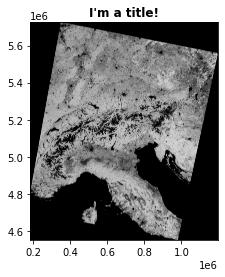

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 3375,
 'height': 3910,
 'count': 1,
 'crs': CRS.from_epsg(32632),
 'transform': Affine(300.0, 0.0, 184107.712218393,
        0.0, -300.0, 5725293.65196346)}

In [6]:
from rasterio.plot import show
show(transp_17_image, transform = (300.0, 0.0, 184107.712218393, 0.0, -300.0, 5725293.65196346), cmap = "gray", title = "I'm a title!")
transp_17_meta

<div class="alert alert-success">
<b>Tasks</b>:
<ul>
    <li> Now we want to plot the same data, but using the imshow() function in matplotlibs pyplot module. </li>
    <li> Please import the pyplot module from matplotlib. </li>
    <li> Add a colorbar (plt.colorbar()). </li>
    <li> Note the differences. </li>
</ul>
</div>

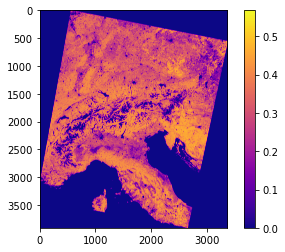

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(transp_17_image, cmap = "plasma")
plt.colorbar()

<div class="alert alert-success">
<b>Tasks</b>:
<ul>
    <li> Repeat this for the sept18.tif file. </li>
</ul>
</div>

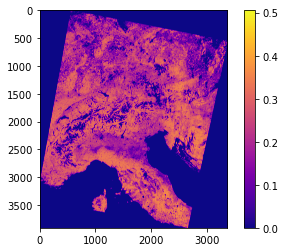

In [8]:
plt.imshow(transp_18_image, cmap = "plasma")
plt.colorbar()

<div class="alert alert-success">
<b>Tasks</b>:
<ul>
    <li> Repeat it again but use a nicer colormap (https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). </li>
</ul></div>

<b>It doesn't really matter if you use imshow() or show(), but keep in mind that you lose geospatial info when using imshow(). But you can more easily get a colorbar. It is possible to get a colorbar while still using the show function of rasterio, but it requires a bit more work, here is the link if you should ever need it https://stackoverflow.com/questions/61327088/rio-plot-show-with-colorbar.</b>

---

# 4 - Delta Map

## 4.1 Check if the maps align

You can use band algebra to assess differences in transpiration rates. Before calculating difference maps, you have to ensure that the images you combine are comparable in terms of geospatial dimensions. This can be done by accessing key metadata entries(transform, boundaries, image width, image height).

<div class="alert alert-success">
<b>Tasks</b>:
<ul>
    <li> Check if the two images have the same width and height (in pixels). </li>
    <li> Check if the two images have the same CRS. </li>
    <li> Check if the two images have the same transform. </li>
    <li> Use logical expressions to test this. </li>
</ul>
</div>

In [9]:
print(transp_17_meta["width"] == transp_18_meta["width"] and transp_17_meta["height"] ==transp_18_meta["height"])
print(transp_17_meta["crs"] == transp_18_meta["crs"])
print(transp_17_meta["transform"] == transp_18_meta["transform"])

True
True
True


## 4.2 Calculating the delta map

<div class="alert alert-success">

<b>Tasks</b>:
<ul>
    <li> Create the delta map. Use Equation 1</li>
    <li> If you get an error message, that is okay, but think about the meaning of the error. </li>
    <li> Print the delta map and think about the values you see. </li>
</ul>
</div>
$$ \frac{(2018 - 2017)} {2017} * 100 $$ (Equation 1)

In [10]:
delta = ((transp_18_image - transp_17_image) / transp_17_image) *100

print(delta)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/tmp/ipykernel_460538/396054632.py:1: RuntimeWarning: divide by zero encountered in true_divide
  delta = ((transp_18_image - transp_17_image) / transp_17_image) *100
/tmp/ipykernel_460538/396054632.py:1: RuntimeWarning: invalid value encountered in true_divide
  delta = ((transp_18_image - transp_17_image) / transp_17_image) *100


## 4.3 Visualizing the delta map

<div class="alert alert-success">
<b>Tasks</b>:
<ul>
    <li> Visualize your delta map. </li>
</ul>
</div>

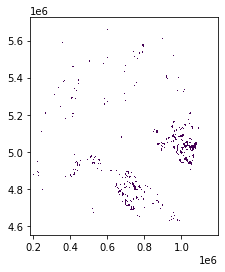

<AxesSubplot:>

In [11]:
show(delta, transform = transp_18_meta["transform"])

In [12]:
#Look at Max/Min values

print(f"Max value is {np.nanmax(delta)} and Min value is {np.nanmin(delta)}")
print(f"5th percentile is {np.nanpercentile(delta,5)} and 95th percentile is {np.nanpercentile(delta, 95)}")



Max value is inf and Min value is -100.0
5th percentile is -100.0 and 95th percentile is 37.370649337768555


<div class="alert alert-success">
<b>You do not see anything right? Don't worry!This can be explained by the fact that we may have very low values in our input data. This in turn can result in very high values (~ infinitely large) if you divide by an extremely small number.</b>:
<ul>
    <li> Look at max and min of the values. Use np.nanmax() and np.nanmin(). The "nan"-methods can handle missing data, while regular methods might fail under these conditions.</li>
    <li> Look at the 5th and 95th percentile. Use np.nanpercentile(). </li>
    <li> All these elements will produce "inf" during the delta map calculation and thus we have to set them to zero in the delta map. Do this using the logicalArray. </li>
</ul>
</div>

We can fix this 
<div class="alert alert-success">
<b>Tasks: In the delta map, replace all "inf" values with zero. </b>:
<ul>
    <li> We can mask all the zero (0) values in the 2017 map. For this we can use the numpy.where method.</li>
    <li> Remember that you can either find help in the numpy online documentation (https://numpy.org/doc/stable/) or by typing numpy.where? (or np.where? depending on your import)</li>
    <li> Please specify that you want to return "True" if the condition is met (where the element is 0 in 2017) and "False" if the condition is not met. This may also help you with the numpy.where method (https://www.sharpsightlabs.com/blog/numpy-where/). </li> 
    <li> Print your mask. </li>
    <li> All the "True" elements will produce "inf" during the delta map calculation and thus we have to set them to zero in the delta map. </li>
    <li> Now use this mask to set all matching elements in the delta map to zero (0). </li>
    <li> Alternatively you can also use logical indexing as learned yesterday (arr_delta[transp_17_image==?] = ?) </li>
</ul>
</div>

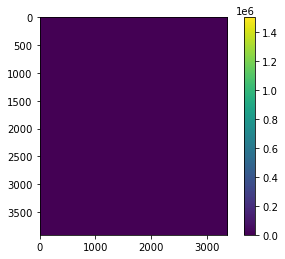

In [13]:
#So wie er es erklärt:
delta_logical_mask= np.where(transp_17_image == 0, True, False)
delta[delta_logical_mask == True] = 0

#schöner:
#delta = np.where(delta == float("inf"), 0, delta)

plt.imshow(delta)
plt.colorbar()

<div class="alert alert-success">
<b>The image looks different, but we still can't get usefull information from this. Let's have another look at the statistics.</b>

<ul>
    <li> Look at max and min of the values. Use np.nanmax() and np.nanmin(). The "nan"-methods can handle missing data, while regular methods might fail under these conditions.</li>
    <li> Look at the 1st, 5th and 95th and 99th percentile. Use np.nanpercentile(). </li>
</ul>
</div>

In [14]:
print(f"Max value is {np.nanmax(delta)} and Min value is {np.nanmin(delta)}")
print(f"5th percentile is {np.nanpercentile(delta,5)} and 95th percentile is {np.nanpercentile(delta, 95)}")

Max value is 1500289.625 and Min value is -100.0
5th percentile is -79.45004081726074 and 95th percentile is 0.0


The maximum is no longer infinitely large (but still very high). This is still unreasonably high, as we can also see from the other statistics. Let's assume that reasonable values fall in the range from the 5th to the 95th percentile. Then we can use this to create an image with reasonable values and impactful visual appearence. The plotting library matplotlib provides an easy way to limit the values. The keywords are vmin and vmax. 

<b>Limit the color range to only use the values from the 5th to the 95th percentile.</b>

<ul>
    <li> Use vmin and vmax in imshow() or show()</li>
</ul>

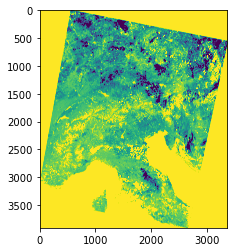

<AxesSubplot:>

In [15]:
show(delta, vmin = np.nanpercentile(delta,5), vmax = np.nanpercentile(delta, 95))

## Plese note that this way of adapting the image (clipping values above and below a certain value) for visualization is a first introduction to the topic. There are more sophisticated ways to treat data for better visualization.

---
# 5 - Exporting to a Geotif

When you want to export the created delta map to a Geotif file there are a few things to consider. 
<ul>
<li> 1. the data stored in our delta_array has no geospatial info. Without geospatial data however we cannot create a *geo*tif. But since we know that our new data has the same geographic information as our input data, we can simply use the data from there. </li>
<li> 2. but how do we create a file? This is easy! We can use the rasterio library and it's Geotif driver. Check this for more details: https://rasterio.readthedocs.io/en/latest/quickstart.html#opening-a-dataset-in-writing-mode </li>
 </ul>

<div class="alert alert-success">
<b>Tasks</b>:
<ul>
    <li> 1. Create a new file using the write "w" mode of rasterio.open, use the "Gtiff" driver, specify also the width, the height, the number of bands ("count"), the crs, the transform and the data type. You can grab this metadata from either transp_18_meta or transp_17_meta. Save this command in the variable "out".</li>
    <li> 2. Write the delta array to this newly created file. Use out.write(data, band_index).</li>
    <li> Open the delta map again, look at the metadata and visualize the map. </li>
</ul>
</div>

In [16]:
# write file
out = rio.open("deltamap.geotiff", mode = "w", driver = "Gtiff", width= transp_17_meta["width"], height = transp_17_meta['height'], count = transp_17_meta["count"], crs = transp_17_meta["crs"], transform = transp_17_meta["transform"], dtype = transp_17_meta["dtype"] )
out.write(delta, 1)
out.close()
    

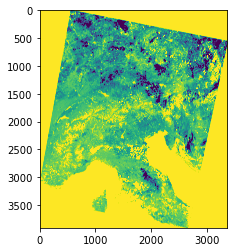

In [17]:
# open and check if everything looks good.
with rio.open("deltamap.geotiff") as deltamap:
    deltaraster = deltamap.read(1)
    show(deltaraster, vmin = np.nanpercentile(deltaraster,5), vmax = np.nanpercentile(deltaraster, 95))

---

# 6 - Descriptive Statistics

<div class="alert alert-success">
<b>Tasks</b>:
<ul>
    <li> Print min, max, mean, median and standard deviation of the delta map. </li>
    <li> Print a long dashed line. </li>
    <li> Print min, max, mean, median and standard deviation of the delta map but filter for values not equal to zero. </li>
</ul>
</div>

In [18]:


print("Max: {maxi}\n".format(maxi = deltaraster.max()))
print("Min: {maxi}\n".format(maxi = deltaraster.min()))
print("Mean: {maxi}\n".format(maxi = deltaraster.mean()))
print("Median: {maxi}\n".format(maxi = np.median(deltaraster)))
print("Standard Deviation: {maxi}\n---------------------------------------".format(maxi = deltaraster.std()))

print("Max: {maxi}\n".format(maxi = np.max(deltaraster[deltaraster !=0])))
print("Min: {maxi}\n".format(maxi = np.min(deltaraster[deltaraster !=0])))
print("Mean: {maxi}\n".format(maxi = np.mean(deltaraster[deltaraster !=0])))
print("Median: {maxi}\n".format(maxi = np.median(deltaraster[deltaraster !=0])))
print("Standard Deviation: {maxi}\n".format(maxi = np.std(deltaraster[deltaraster !=0])))

Max: 1500289.625

Min: -100.0

Mean: -15.460006713867188

Median: 0.0

Standard Deviation: 691.1613159179688
---------------------------------------
Max: 1500289.625

Min: -100.0

Mean: -29.04853630065918

Median: -27.107446670532227

Standard Deviation: 947.1990356445312



---
# 7 - Extracting Transects

You can also try visualizing transects of your transpiration maps and corresponding delta map. Let's make a vertical transect along pixel 1000 on the x-axis. Frist visualize the transect on the map and then show the transpiration.

<div class="alert alert-success">
<b>Tasks</b>:
<ul>
    <li> Plot the delta map. Don't forget to specify vmin and vmax!</li>
    <li> Plot a line that illustrates the location of the transect. Use the _axvline()_ function. </li>
</ul>
</div>

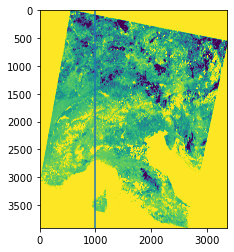

In [19]:
plt.imshow(deltaraster, vmin = np.nanpercentile(deltaraster,5), vmax = np.nanpercentile(deltaraster, 95))
plt.axvline(x = 1000)

<div class="alert alert-success">
<b>Tasks</b>:
<ul>
    <li> Store the transects in new arrays. Create one for each file (original files and delta map). </li>
    <li> Create two subplots. </li>
    <li> Create a first subplot where you show the transect data in the original files. </li>
    <li> Create the second subplot with the transect data of the delta map. </li>
    <li> Add labels and a legend. </li>
</ul>
</div>

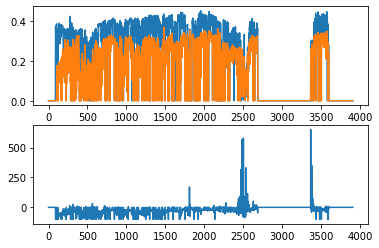

In [20]:
deltatrans = delta[:,1000]
trans17 = transp_17_image[:,1000]
trans18 = transp_18_image[:,1000]

fig, ax = plt.subplots(2)


# plot cosine and sine
ax[1].plot(deltatrans)
ax[0].plot(trans17)
ax[0].plot(trans18)

#ax[1].set_xlim(0, 5000)
#ax[0].set_xlim(0, 5000)

In [22]:
type(trans17)

numpy.ndarray

---
# Bonus question for the interested geospatial visualist. 
After completing the whole content of todays exercise, try to create a visualization based on the delta transpiration map and the location of the Irchel Campus. 
<div class="alert alert-success">
<b>Tasks</b>:
<ul>
    <li> 1. Import the "numpy" library (we often use the abbreviation "np") </li>
    <li> 2. Import matplotlib's pyplot module. </li>
    <li> 3. From matplotlib's mpl_toolkits.axes_grid1.inset_locator module import the function mark_inset. </li>
    <li> 4. Import the "rasterio" library (we often use the abbreviation "rio") </li>
    <li> 5. From rasterio's plot module import the function show. </li>
    <li> 6. Create a figure using the subplots() function. Store the output from the function in the variables fig and ax1. </li>
    <li> 7. Use the show function to plot the delta transpiration map, use transp_17_meta to get the transform information. Specify ax=ax1. This will put the image into the created axes object.</li>
    <li> 8. Define these axis limits: x=(275000,500000), y=(5100000,5300000). Use xlim() and ylim() for this.</li>
    <li> 9. Use the inset_axes function defined in the ax1 object, to create a new inset axis at position [0.4, 0.1, 0.4, 0.4] (x origin, y origin, width, height; relative to ax1), name it axins1.</li>
    <li> 10. Use the show function to plot delta transpiration map, use transp_17_meta to get the transform. Specify ax=axins1. </li>
    <li> 11. Use the perimeter defined above in geographic coordinates to define the Irchel Campus. Use xlim() and ylim() for this. </li>
    <li> 12. Use the mark_inset function to display the zoomed-in region. Specify both ax1 and axins1 as well as the corners where you want to draw the lines to (loc1, loc2), use the keyword "ec" to define the line color.</li>
</ul>
</div>

## Gute Webseite zu Rasterio:

https://rasterio.readthedocs.io/en/latest/quickstart.html#opening-a-dataset-in-writing-mode